In [1]:
import numpy as np
import seaborn
seaborn.set_style("whitegrid")
seaborn.set_context("talk")

In [6]:
from src.population_distributions import get_population_binary_classification
from src.simulation import simulation, get_agg_dist, get_agg
from src.metrics import precision_calc, recall_calc, f1_calc
from src.visualizations import plot_confidence_intervals_col, plot_confidende_intervals_highlight

# Simulating a binary classifier situation

Lest start with a population of 50% positive and 50% negative examples as well as a classifier that predicts at random

In [3]:

bin_classification = get_population_binary_classification(p_pop=0.5, p_pred=0.5, n=1)
imbalanced_class = get_population_binary_classification(p_pop=0.1, p_pred=0.1, n=1)

## Bootstrapping a simulated binary classification problem with 50% occurence of the positive class

### Use sample size of 1000

In [4]:
res_sim_class, pop_metrics = simulation(bin_classification, metric_functions={"prec": precision_calc, "f1": f1_calc, "rec": recall_calc}, 
           num_sample_draws=100)

100%|██████████| 100/100 [07:24<00:00,  4.45s/it]


Number of simulations where the population metric lies within the confidence interval


Average distance between upper and lower bound of the confidence interval for each metric




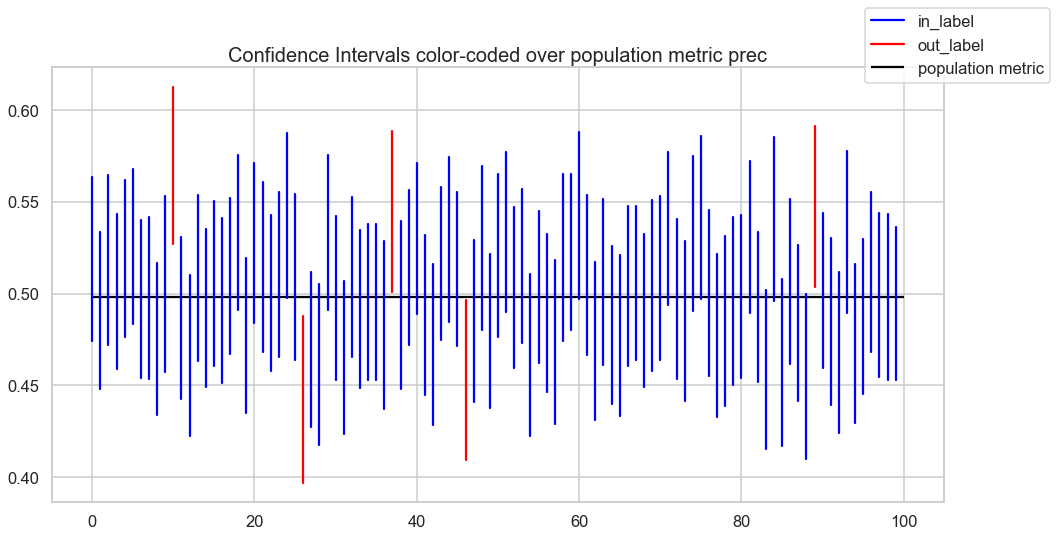

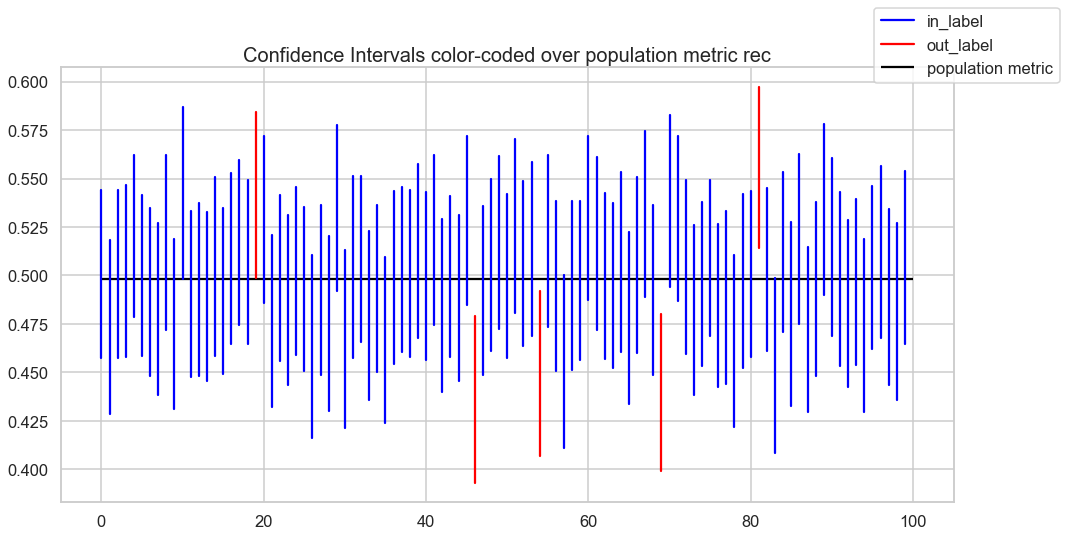

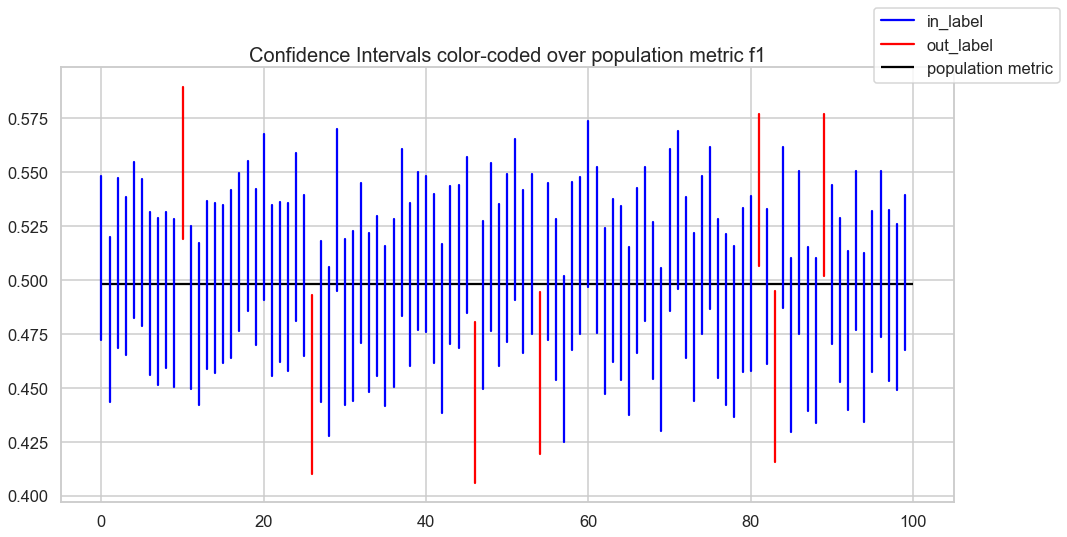

In [99]:
print("Number of simulations where the population metric lies within the confidence interval")
get_agg(res_sim_class, np.sum, ["prec", "rec", "f1"])
print("\n")
print("Average distance between upper and lower bound of the confidence interval for each metric")
get_agg_dist(res_sim_class, np.mean, ["prec", "rec", "f1"])
print("\n")

plot_confidende_intervals_highlight(res_sim_class, pop_metrics, "prec")
plot_confidende_intervals_highlight(res_sim_class, pop_metrics, "rec")
plot_confidende_intervals_highlight(res_sim_class, pop_metrics, "f1")

## Bootstrapping a simulated binary classification problem with 10% occurence of the positive class

### Use sample size of 1000

In [14]:
res_sim_class_imbalanced, pop_metrics_imbalanced = simulation(imbalanced_class, metric_functions={"prec": precision_calc, "f1": f1_calc, "rec": recall_calc}, 
           num_sample_draws=100, pop_size=100000, sample_size=1000, resample_size=1000, num_bootstraps=1000, coverage=0.9)

100%|██████████| 100/100 [06:47<00:00,  4.07s/it]


Number of simulations where the population metric lies within the confidence interval
{'prec': 86, 'rec': 92, 'f1': 89}


Average distance between upper and lower bound of the confidence interval for each metric
{'prec': 0.09631340036594471, 'rec': 0.09608413103830432, 'f1': 0.09291372433016848}




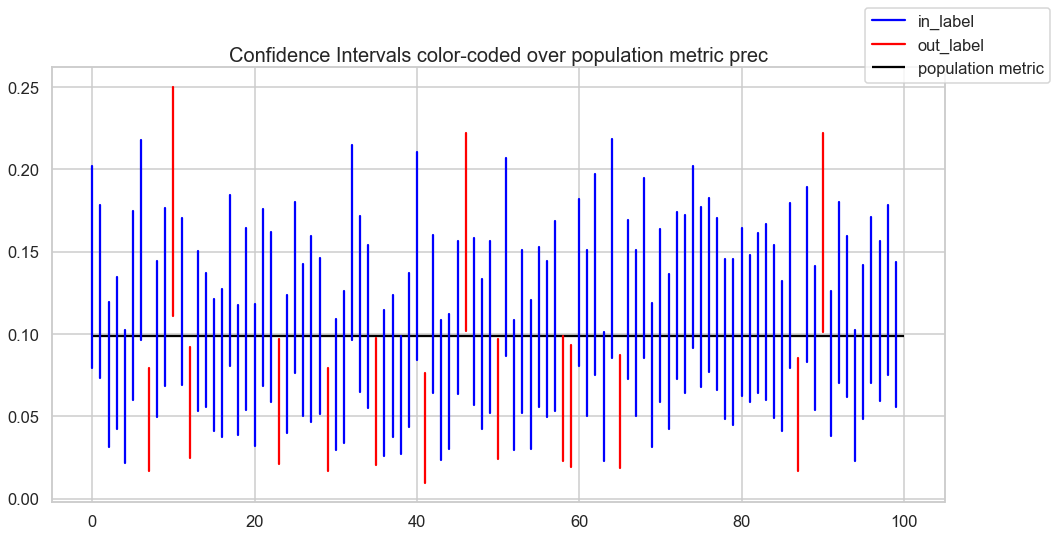

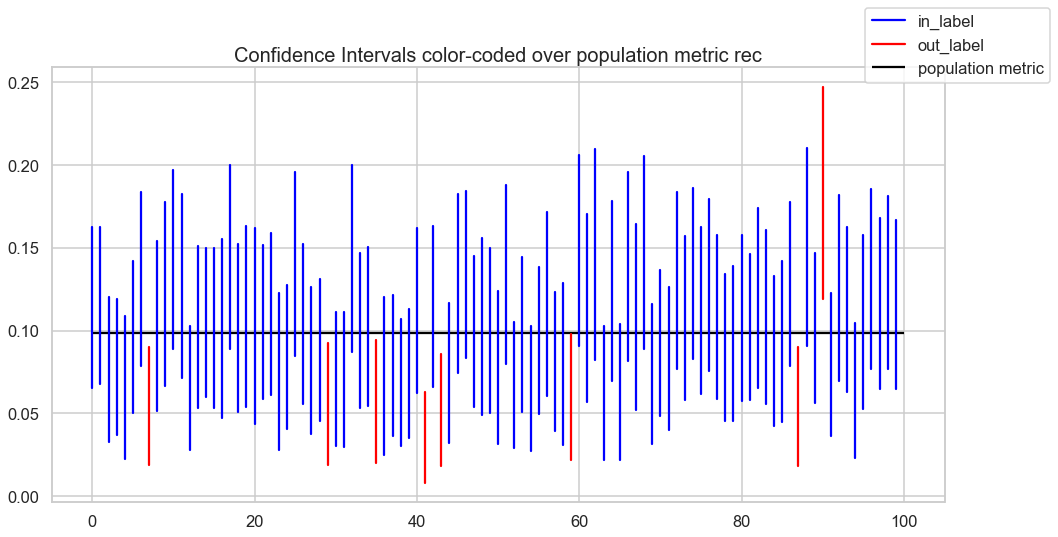

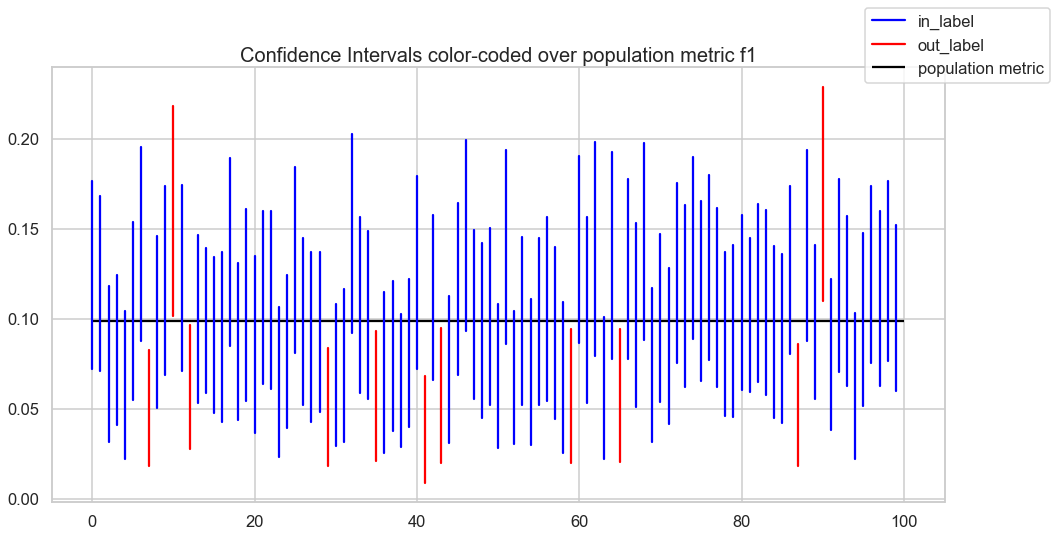

In [98]:
print("Number of simulations where the population metric lies within the confidence interval")
print(get_agg(res_sim_class_imbalanced, np.sum, metrics=["prec", "rec", "f1"]))
print("\n")
print("Average distance between upper and lower bound of the confidence interval for each metric")
print(get_agg_dist(res_sim_class_imbalanced, np.mean, metrics=["prec", "rec", "f1"]))
print("\n")
plot_confidende_intervals_highlight(res_sim_class_imbalanced, pop_metrics_imbalanced, "prec")
plot_confidende_intervals_highlight(res_sim_class_imbalanced, pop_metrics_imbalanced, "rec")
plot_confidende_intervals_highlight(res_sim_class_imbalanced, pop_metrics_imbalanced, "f1")

### Use sample size of 5000

In [20]:
res_sim_class_imbalanced_larger, pop_metrics_larger = \
    simulation(imbalanced_class, metric_functions={"prec": precision_calc, "f1": f1_calc, "rec": recall_calc}, 
               num_sample_draws=100, pop_size=100000, sample_size=5000, resample_size=5000, num_bootstraps=1000, 
               coverage=0.9)

100%|██████████| 100/100 [27:51<00:00, 16.72s/it]


Number of simulations where the population metric lies within the confidence interval
{'prec': 83, 'rec': 81, 'f1': 83}


Average distance between upper and lower bound of the confidence interval for each metric
{'prec': 0.04236567933321242, 'rec': 0.04251894888028558, 'f1': 0.041294960747535144}




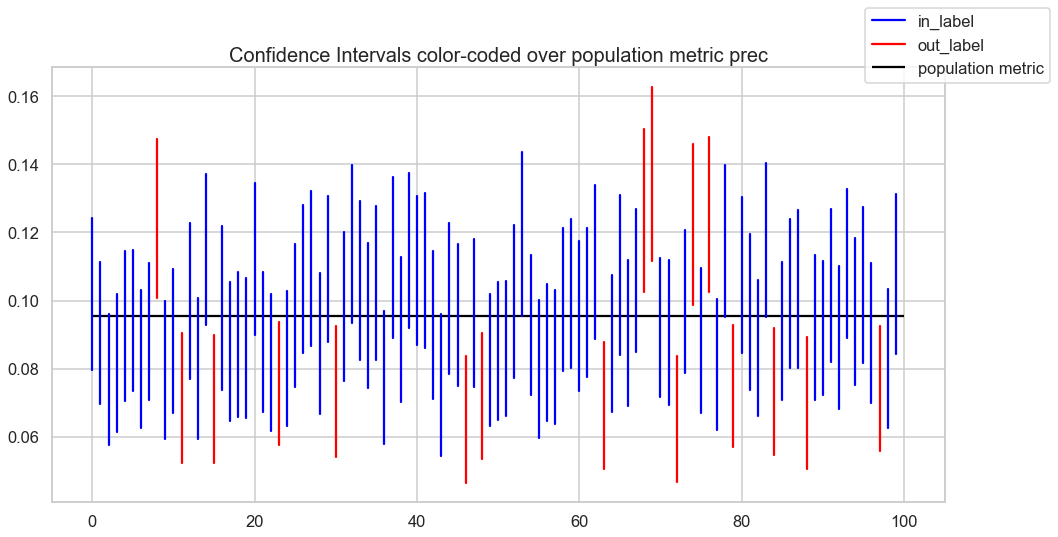

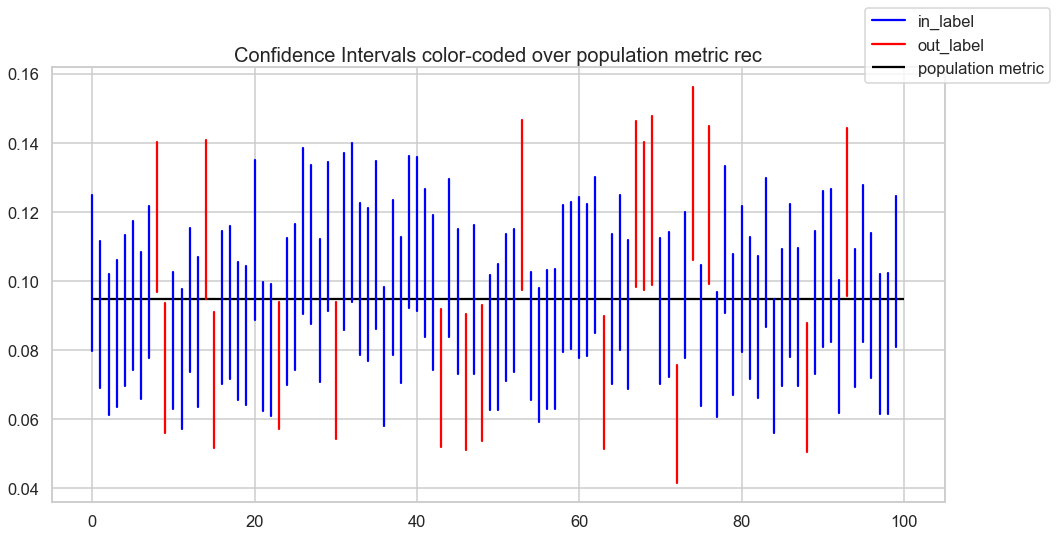

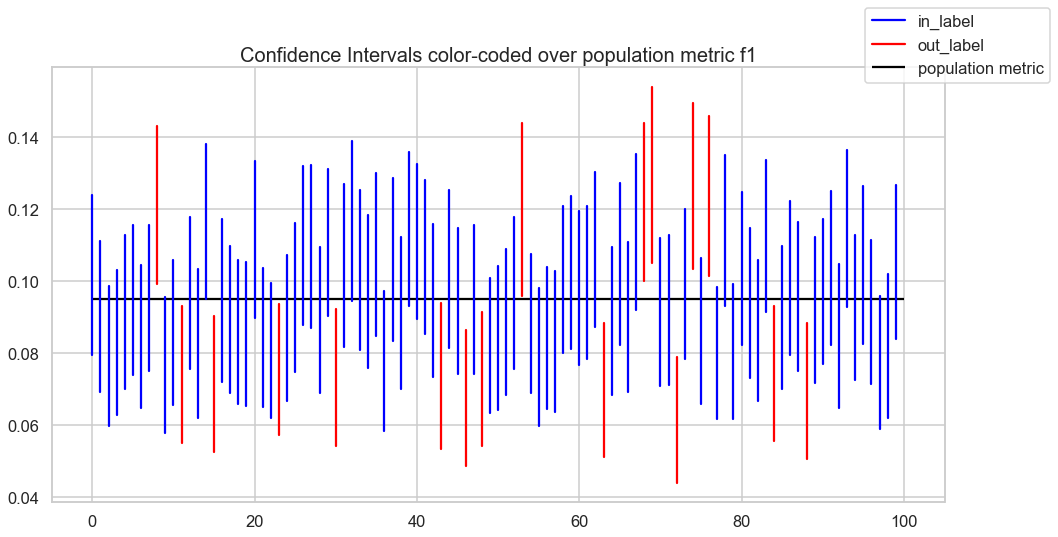

In [97]:
print("Number of simulations where the population metric lies within the confidence interval")
print(get_agg(res_sim_class_imbalanced_larger, np.sum, metrics=["prec", "rec", "f1"]))
print("\n")
print("Average distance between upper and lower bound of the confidence interval for each metric")
print(get_agg_dist(res_sim_class_imbalanced_larger, np.mean, metrics=["prec", "rec", "f1"]))
print("\n")
plot_confidende_intervals_highlight(res_sim_class_imbalanced_larger, pop_metrics_larger, "prec")
plot_confidende_intervals_highlight(res_sim_class_imbalanced_larger, pop_metrics_larger, "rec")
plot_confidende_intervals_highlight(res_sim_class_imbalanced_larger, pop_metrics_larger, "f1")

### Use sample size of 500

In [30]:
res_sim_class_imbalanced_smaller, pop_metrics_smaller = \
    simulation(imbalanced_class, metric_functions={"prec": precision_calc, "f1": f1_calc, "rec": recall_calc}, 
               num_sample_draws=100, pop_size=100000, sample_size=500, resample_size=500, num_bootstraps=1000, 
               coverage=0.9)

100%|██████████| 100/100 [04:49<00:00,  2.89s/it]


Number of simulations where the population metric lies within the confidence interval
{'prec': 88, 'rec': 87, 'f1': 88}


Average distance between upper and lower bound of the confidence interval for each metric
{'prec': 0.13594451441224364, 'rec': 0.14077976943359446, 'f1': 0.13263509294547718}




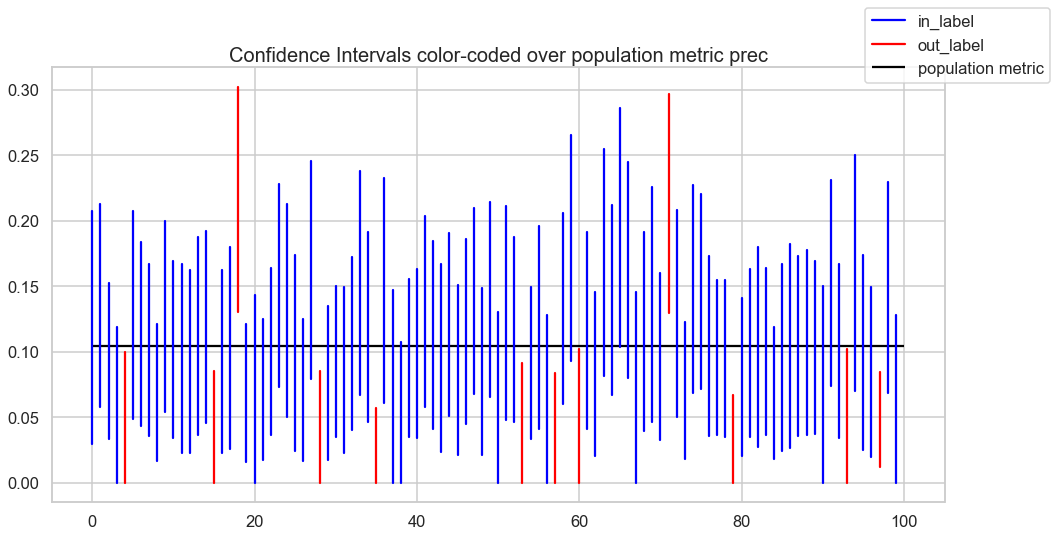

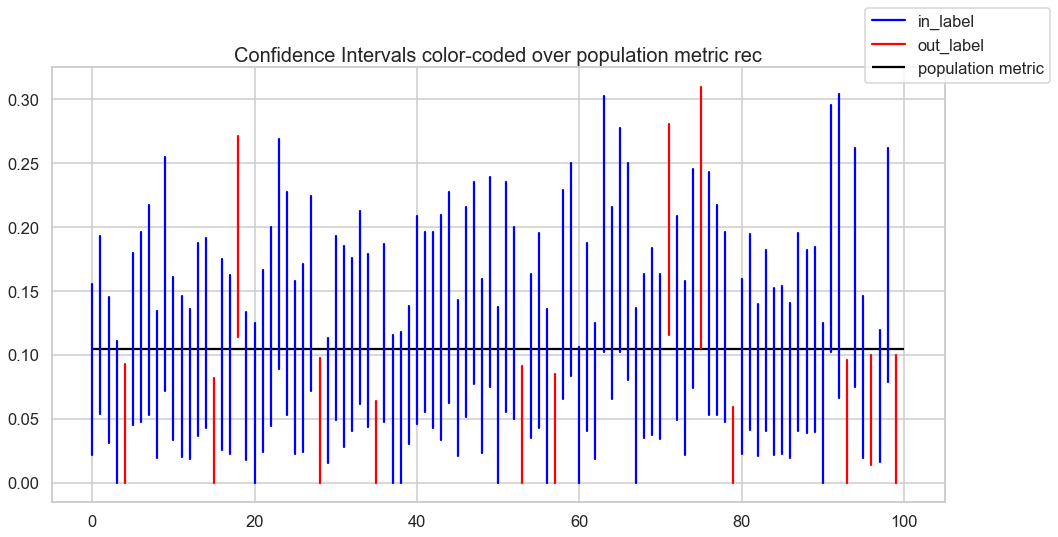

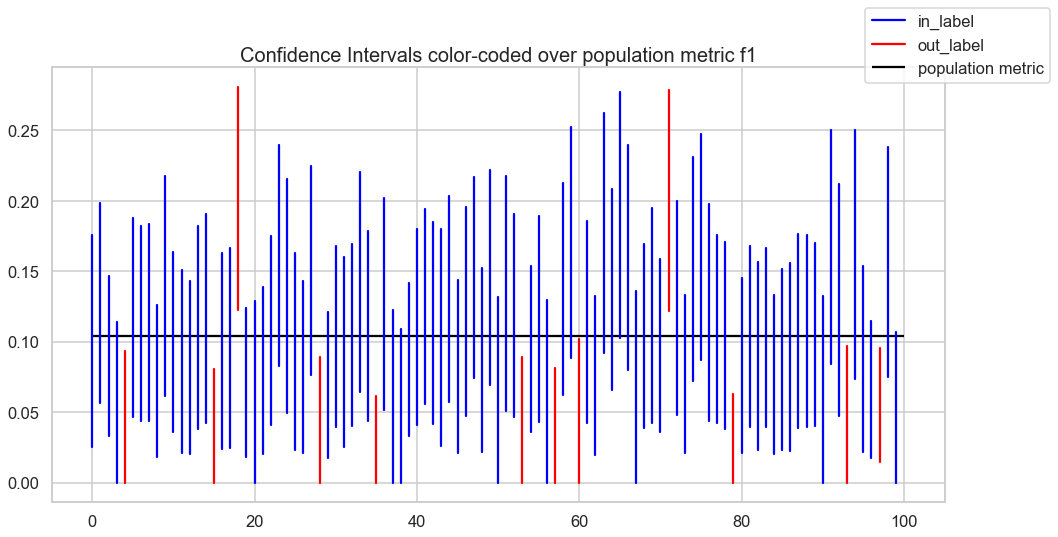

In [85]:
print("Number of simulations where the population metric lies within the confidence interval")
print(get_agg(res_sim_class_imbalanced_smaller, np.sum, metrics=["prec", "rec", "f1"]))
print("\n")
print("Average distance between upper and lower bound of the confidence interval for each metric")
print(get_agg_dist(res_sim_class_imbalanced_smaller, np.mean, metrics=["prec", "rec", "f1"]))
print("\n")

plot_confidende_intervals_highlight(res_sim_class_imbalanced_smaller, pop_metrics_smaller, "prec")
plot_confidende_intervals_highlight(res_sim_class_imbalanced_smaller, pop_metrics_smaller, "rec")
plot_confidende_intervals_highlight(res_sim_class_imbalanced_smaller, pop_metrics_smaller, "f1")

### Use sample size of 8000

In [93]:
res_sim_class_imbalanced_8k, pop_metrics_8k = \
    simulation(imbalanced_class, metric_functions={"prec": precision_calc, "f1": f1_calc, "rec": recall_calc}, 
               num_sample_draws=100, pop_size=100000, sample_size=8000, resample_size=8000, num_bootstraps=1000, 
               coverage=0.9)


100%|██████████| 100/100 [53:57<00:00, 32.38s/it]


Number of simulations where the population metric lies within the confidence interval
{'prec': 89, 'rec': 81, 'f1': 85}


Average distance between upper and lower bound of the confidence interval for each metric
{'prec': 0.03424477438872001, 'rec': 0.034893433737802744, 'f1': 0.03367287501482403}




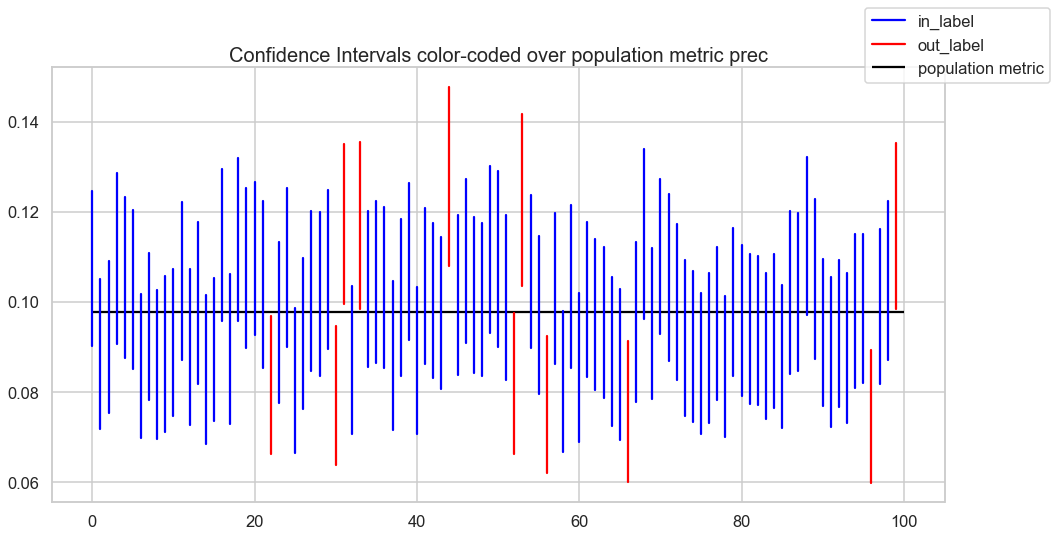

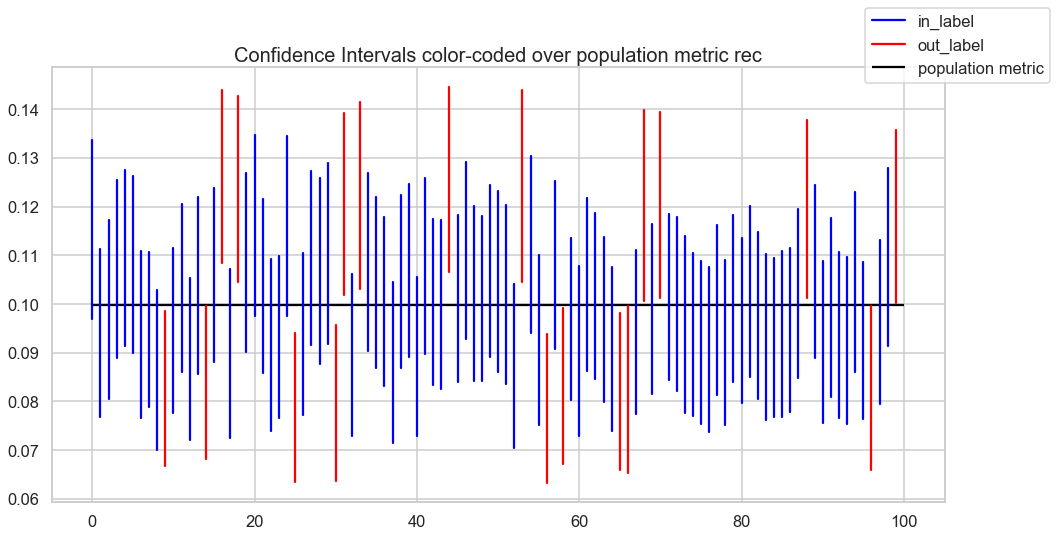

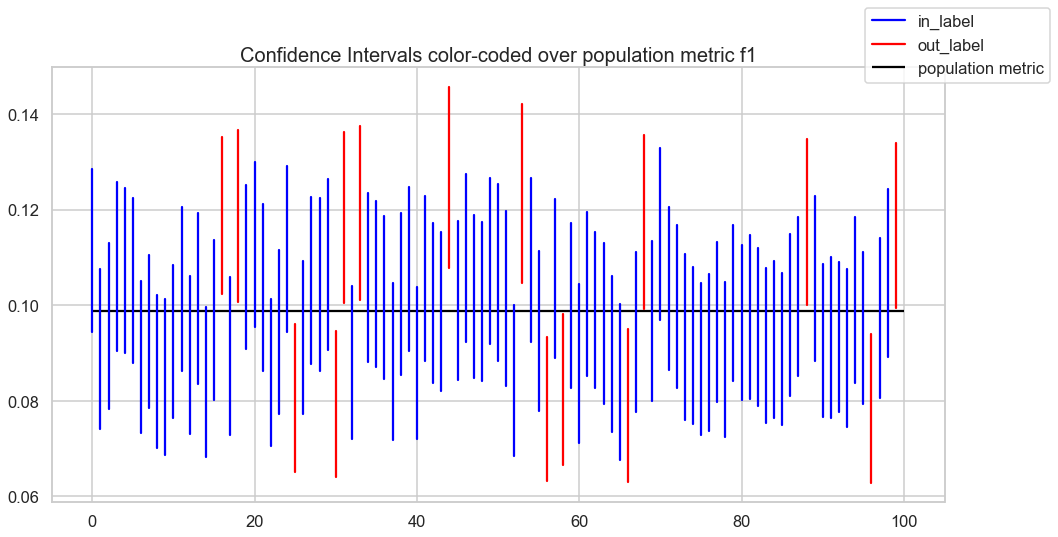

In [106]:
print("Number of simulations where the population metric lies within the confidence interval")
print(get_agg(res_sim_class_imbalanced_8k, np.sum, metrics=["prec", "rec", "f1"]))
print("\n")
print("Average distance between upper and lower bound of the confidence interval for each metric")
print(get_agg_dist(res_sim_class_imbalanced_8k, np.mean, metrics=["prec", "rec", "f1"]))
print("\n")

plot_confidende_intervals_highlight(res_sim_class_imbalanced_8k, pop_metrics_8k, "prec")
plot_confidende_intervals_highlight(res_sim_class_imbalanced_8k, pop_metrics_8k, "rec")
plot_confidende_intervals_highlight(res_sim_class_imbalanced_8k, pop_metrics_8k, "f1")

### Use sample size of 10000

In [100]:
res_sim_class_imbalanced_10k, pop_metrics_10k = \
    simulation(imbalanced_class, metric_functions={"prec": precision_calc, "f1": f1_calc, "rec": recall_calc}, 
               num_sample_draws=100, pop_size=100000, sample_size=10000, resample_size=10000, num_bootstraps=1000, 
               coverage=0.9)


100%|██████████| 100/100 [5:22:51<00:00, 193.72s/it][A


Number of simulations where the population metric lies within the confidence interval
{'prec': 89, 'rec': 94, 'f1': 92}


Average distance between upper and lower bound of the confidence interval for each metric
{'prec': 0.03119039172184584, 'rec': 0.03111370358624944, 'f1': 0.030311021998839668}




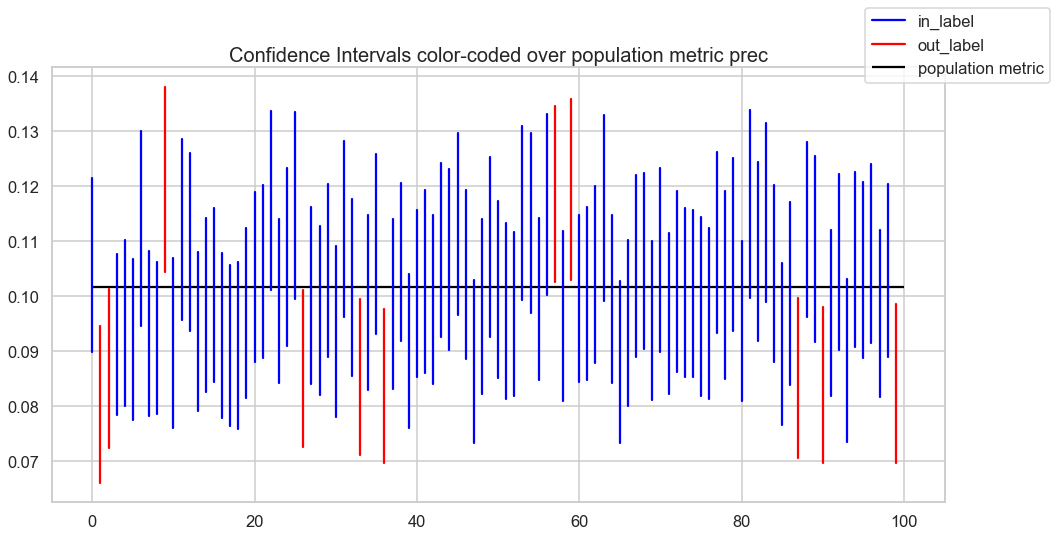

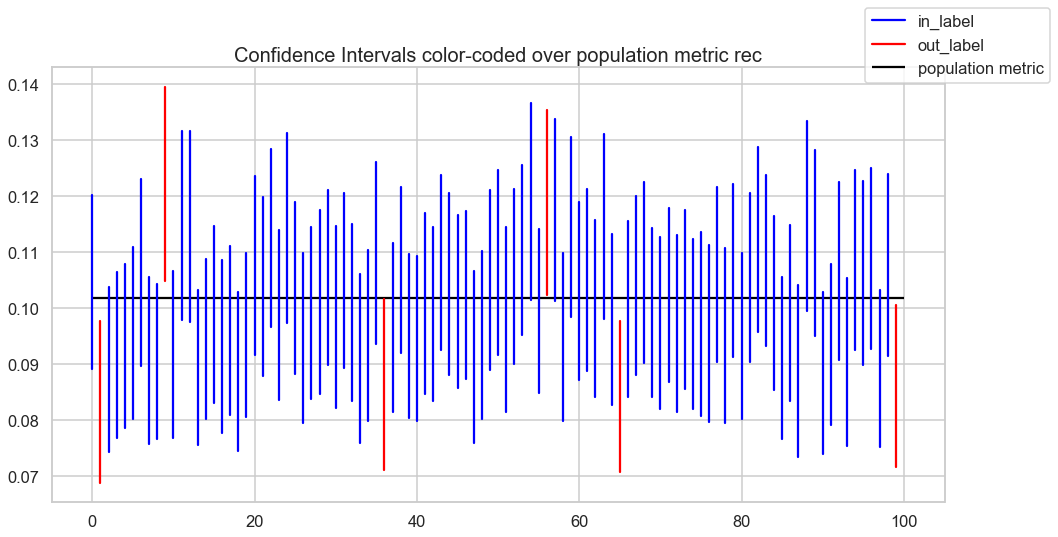

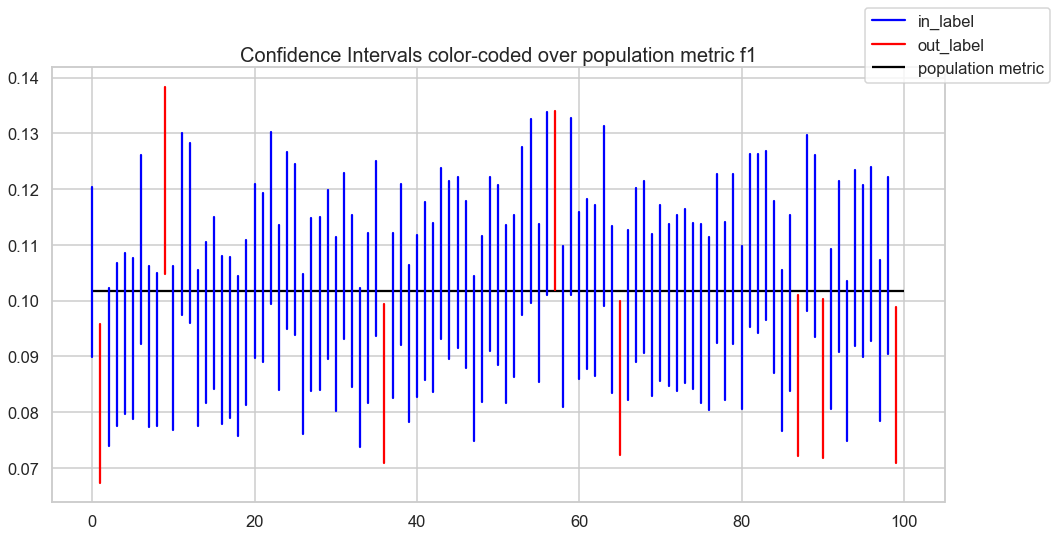

In [105]:
print("Number of simulations where the population metric lies within the confidence interval")
print(get_agg(res_sim_class_imbalanced_10k, np.sum, metrics=["prec", "rec", "f1"]))
print("\n")
print("Average distance between upper and lower bound of the confidence interval for each metric")
print(get_agg_dist(res_sim_class_imbalanced_10k, np.mean, metrics=["prec", "rec", "f1"]))
print("\n")

plot_confidende_intervals_highlight(res_sim_class_imbalanced_10k, pop_metrics_10k, "prec")
plot_confidende_intervals_highlight(res_sim_class_imbalanced_10k, pop_metrics_10k, "rec")
plot_confidende_intervals_highlight(res_sim_class_imbalanced_10k, pop_metrics_10k, "f1")

In [92]:
from typing import Dict, Any
import pandas as pd
def plot_differences_boxplot(sim_res_multi: Dict[str, Any], metric):
    final_list_tuples = []
    for sim_name, sim_res in sim_res_multi.items():
        diff = [(sim_name, res[metric].metric_confidence.upper_bound - res[metric].metric_confidence.lower_bound) for res in sim_res]
        final_list_tuples.extend(diff)
    data = pd.DataFrame(final_list_tuples, columns=["simulation_name", "confidence_interval_difference"])
    plt.figure(figsize=[20, 13])
    seaborn.boxplot(x="simulation_name", y="confidence_interval_difference", data=data)
    plt.title(f"Boxplot for Confidence Interval distances for metric {metric} in different simulations")

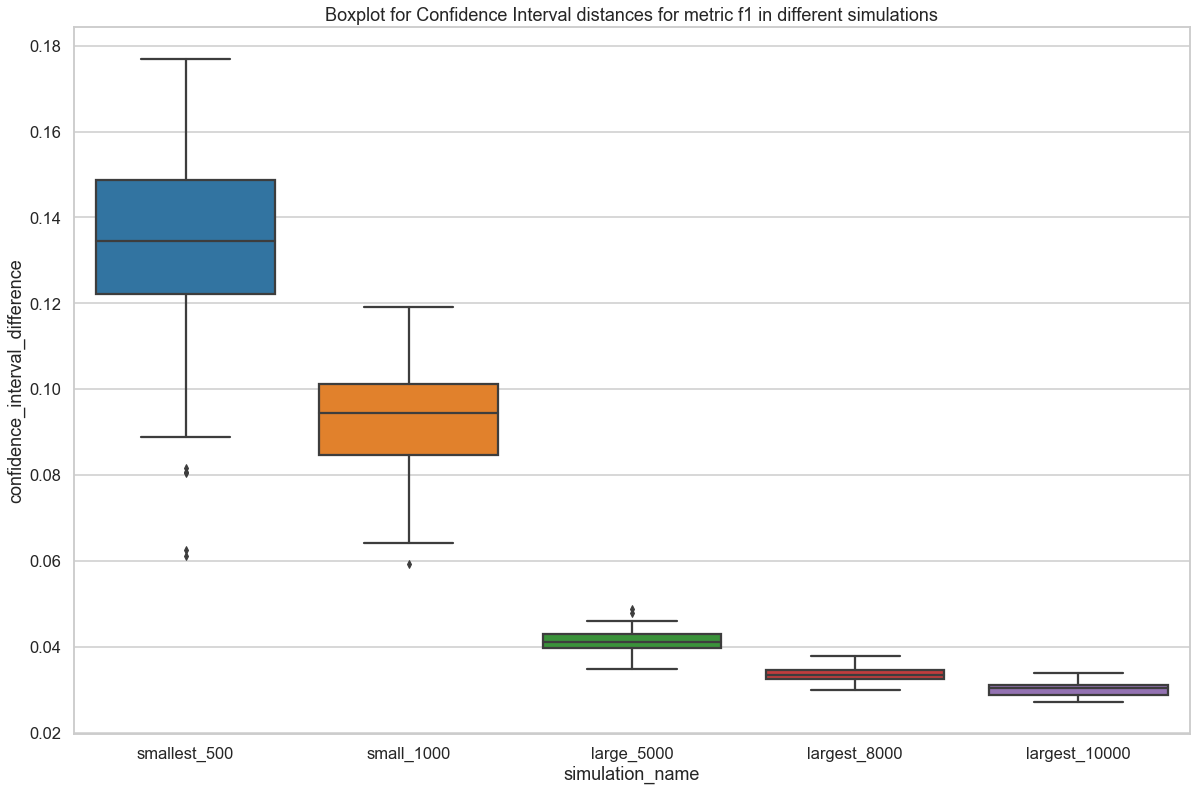

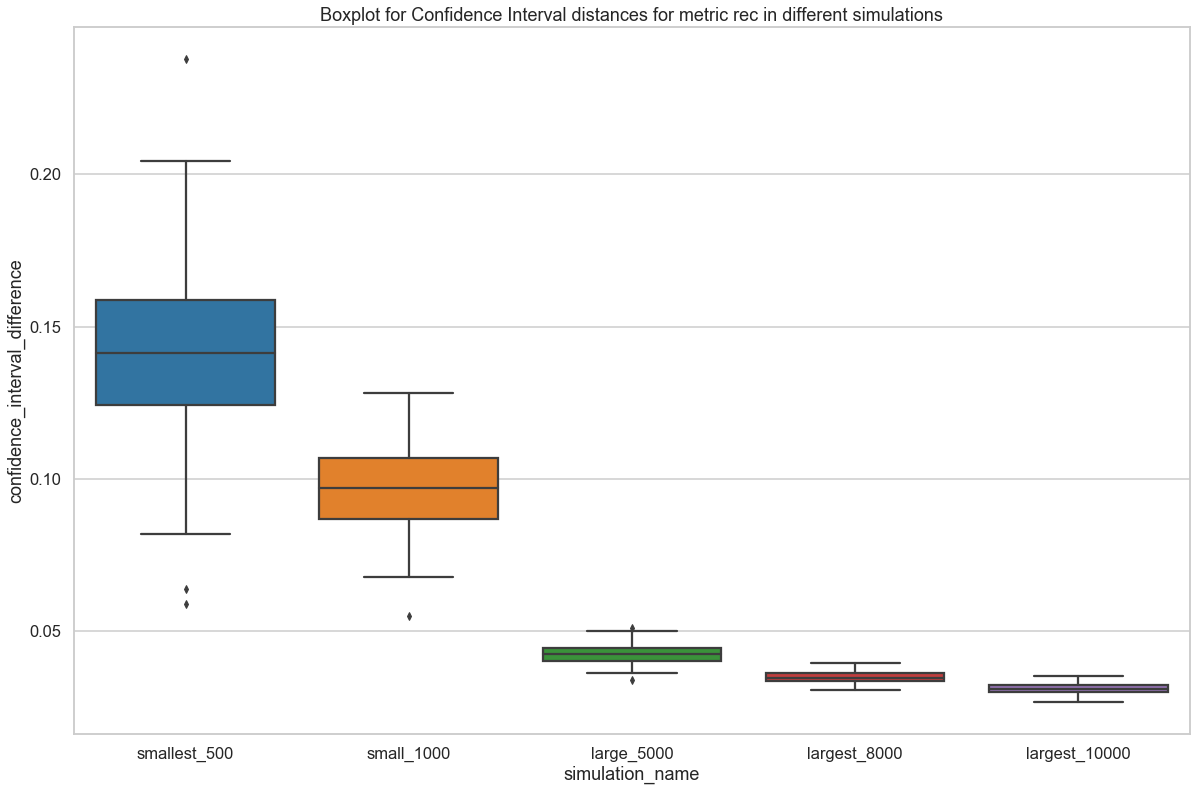

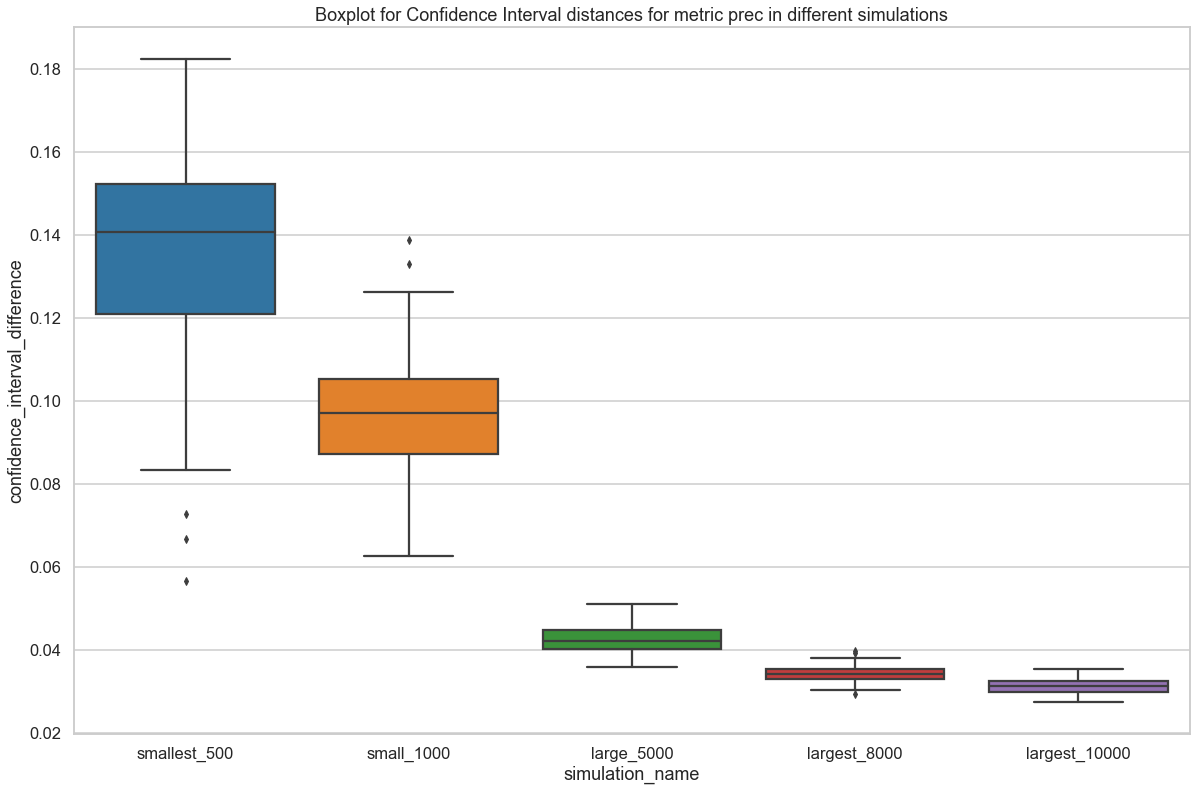

In [102]:


plot_differences_boxplot({"smallest_500": res_sim_class_imbalanced_smaller, 
                          "small_1000": res_sim_class_imbalanced, 
                          "large_5000": res_sim_class_imbalanced_larger,
                          "largest_8000": res_sim_class_imbalanced_8k,
                          "largest_10000": res_sim_class_imbalanced_10k}, "f1")
plot_differences_boxplot({"smallest_500": res_sim_class_imbalanced_smaller, 
                          "small_1000": res_sim_class_imbalanced, 
                          "large_5000": res_sim_class_imbalanced_larger,
                          "largest_8000": res_sim_class_imbalanced_8k,
                          "largest_10000": res_sim_class_imbalanced_10k}, "rec")
plot_differences_boxplot({"smallest_500": res_sim_class_imbalanced_smaller, 
                          "small_1000": res_sim_class_imbalanced, 
                          "large_5000": res_sim_class_imbalanced_larger,
                          "largest_8000": res_sim_class_imbalanced_8k,
                          "largest_10000": res_sim_class_imbalanced_10k}, "prec")